In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [24]:
#Import dataset 
# Project folder path 
path = r'C:\Users\hp\08-2024 Instacart Basket Analysis'
# Import orders products merged
ords_prods_merge = pd.read_pickle(os.path.join(path,'Data', 'Prepared Data', 'ords_prods_aggregated.pkl'))

In [6]:
ords_prods_merge.shape

(32404161, 24)

In [8]:
ords_prods_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,price_range_loc,busiest day,busiest days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent Customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent Customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Mid-range product,Busiest day,Busiest days,Fewest orders,5,New customer,7.930208,Low_spender,8.0,Frequent Customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Mid-range product,Regularly busy,Slowest days,Most orders,3,New customer,4.972414,Low_spender,9.0,Frequent Customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Mid-range product,Least busy,Slowest days,Average orders,3,New customer,4.972414,Low_spender,9.0,Frequent Customer


# 1. Bar Chart 

<Axes: xlabel='order_dow'>

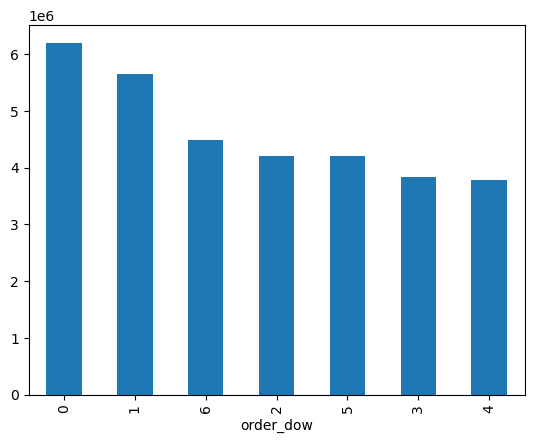

In [14]:
ords_prods_merge['order_dow'].value_counts().plot.bar()

it's ordered from largest to smallest. to change this
#bar = ords_prods_merge['order_dow'].value_counts().sort_index().plot.bar()

(This same trick can actually be used when printing frequencies)

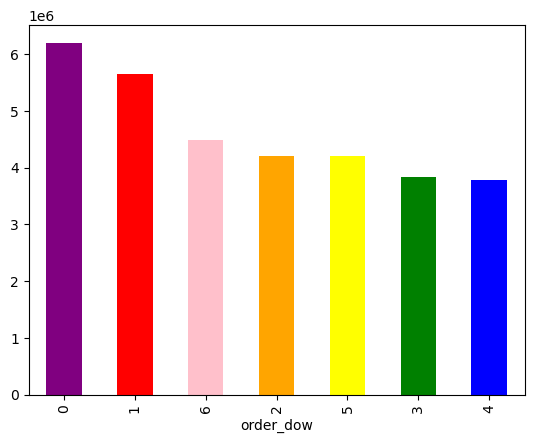

In [18]:
bar = ords_prods_merge['order_dow'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [30]:
#export it outside of Jupyter in the form of an image file. 
bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_orders_dow.png'))

# 2. Histograms and Scatterplots

<Axes: ylabel='Frequency'>

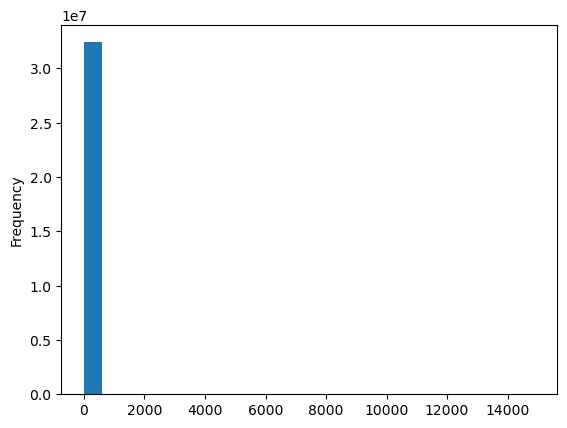

In [33]:
#Histogram of price column 
ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

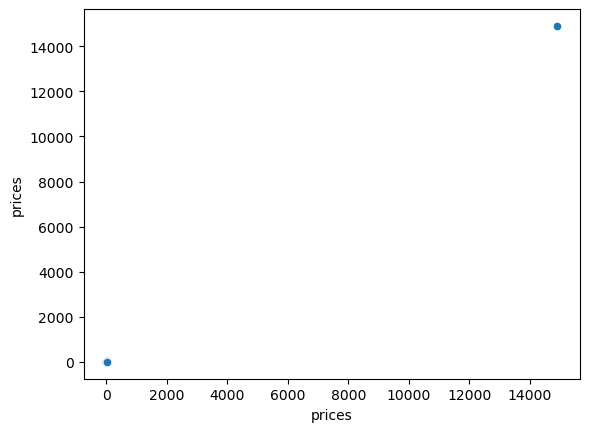

In [35]:
#using scatterplots to visualize the distribution of data points in order to identify any outliers. 
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [37]:
#Further investigation
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,price_range_loc,busiest day,busiest days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High_spender,5.0,Frequent Customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,High-range product,Regularly busy,Regularly busy,Average orders,40,Regular customer,108.648299,High_spender,5.0,Frequent Customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,High-range product,Regularly busy,Regularly busy,Fewest orders,4,New customer,1154.792308,High_spender,12.0,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High_spender,12.0,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,High-range product,Regularly busy,Busiest days,Fewest orders,16,Regular customer,114.426619,High_spender,23.0,Non_frequent_customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13104571,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3172853,205650,18,1,9,...,High-range product,Regularly busy,Busiest days,Average orders,25,Regular customer,351.141618,High_spender,6.0,Frequent Customer
13104572,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,2504315,205818,3,5,15,...,High-range product,Regularly busy,Regularly busy,Most orders,25,Regular customer,170.073770,High_spender,13.0,Regular customer
13104573,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,1108388,205818,5,4,5,...,High-range product,Least busy,Slowest days,Fewest orders,25,Regular customer,170.073770,High_spender,13.0,Regular customer
13104574,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,1916142,206049,1,2,17,...,High-range product,Regularly busy,Regularly busy,Average orders,5,New customer,938.031250,High_spender,7.0,Frequent Customer


In [39]:
#These prices doesn't make sens, for now we will mark them as missing 
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [41]:
#Check 
ords_prods_merge['prices'].max()

25.0

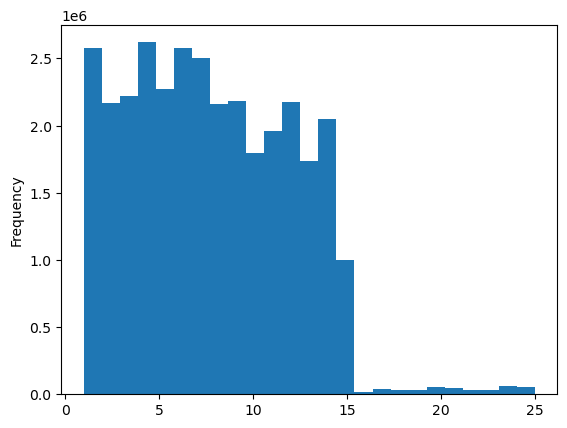

In [43]:
#Retrying the Histogram :
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

most products are between 1 and 15, while a few are higher priced at $15 to 25.

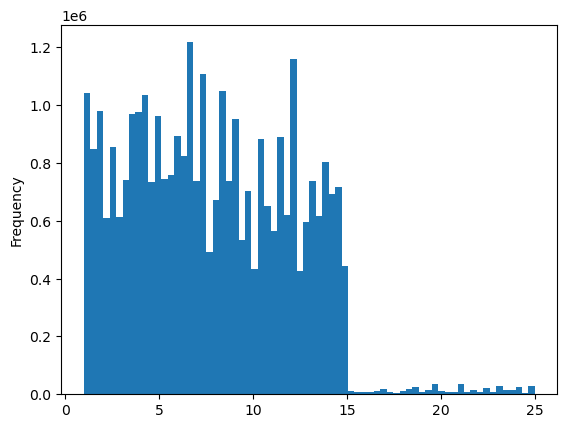

In [48]:
#Increasing the number of bins
hist2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [52]:
#export it outside of Jupyter in the form of an image file. 
hist2.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'hist_prices.png'))

# 3. Line Charts

## 3.1 Sampling data 

In [66]:
np.random.seed(4)
#Creating a list holding true/false values to test np.random.rand() <= 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [58]:
dev

array([False,  True, False, ...,  True,  True, False])

In [62]:
# better picture what the function does:
np.random.rand(10)

array([0.44592973, 0.61877437, 0.0018562 , 0.48660382, 0.89582266,
       0.38090608, 0.60698004, 0.72926005, 0.25039912, 0.40943937])

In [64]:
#We now have a list of 32,434,212 boolean values and a dataframe that’s 32,434,212 rows long

In [68]:
#to split dataframe into two samples
#Store 70% of the sample in the dataframe big 
big = ords_prods_merge[dev]
#Store 30% of the sample in the dataframe small 
small = ords_prods_merge[~dev]

In [70]:
#Check 
len(ords_prods_merge)

32404161

In [72]:
len(big) + len(small)

32404161

In [74]:
#Creating df_2 that contains only prices and orders days of week columns from small subset 
df_2 = small[['order_dow','prices']]

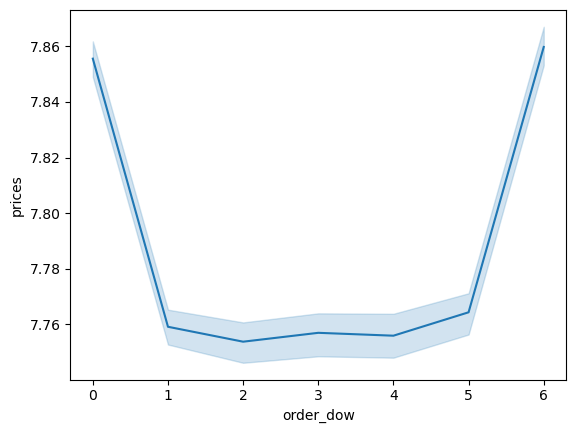

In [76]:
#Creating the chart
line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices')

In [78]:
#export it outside of Jupyter in the form of an image file
line.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_prices_orderdow.png'))